#What is the RAG system?

## Defination:

This is called retrieval augmented generation (RAG), as you would retrieve the relevant data and use it as augmented context for the LLM. Instead of relying solely on knowledge derived from the training data, a RAG workflow pulls relevant information and connects static LLMs with real-time data retrieval.

## Architecture:

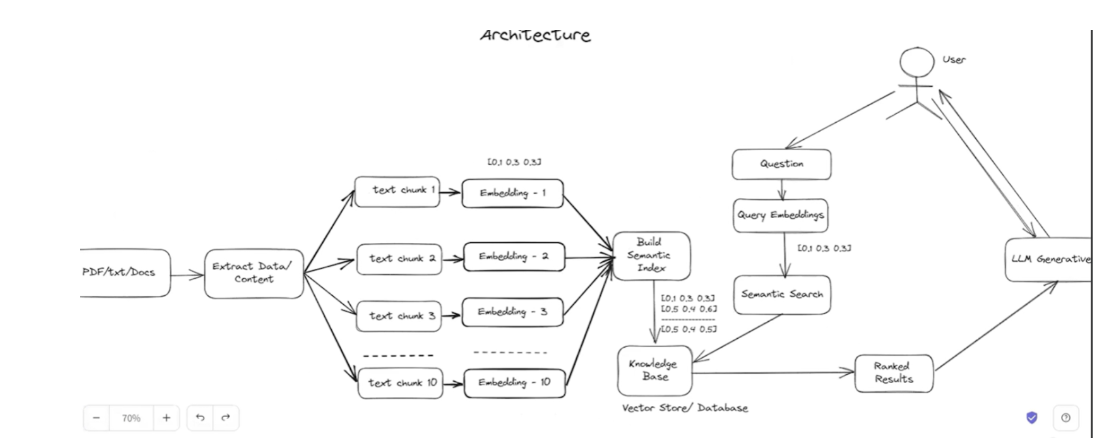

## Why we create a RAG System?

Retrieval systems (RAG) give LLM systems access to factual, access-controlled, timely information.

1. RAG REDUCES HALLUCINATION

Example: In the financial services industry, providing accurate information on investment options is crucial because it directly impacts customers' purchasing decisions and financial well-being. RAG can help ensure that the information generated about stocks, bonds, or mutual funds

2. COST-EFFECTIVE ALTERNATIVE

Example: Banks often need to assess the creditworthiness of potential borrowers. Fine-tuning pre-trained language models to analyse credit histories can be resource-intensive. RAG architecture offers a cost-effective alternative by retrieving relevant financial data and credit history information from existing databases, combining this with pre-trained language models

3. CREDIBLE AND ACCURATE RESPONSES

Example: In customer support, providing accurate and helpful responses is essential for maintaining customer trust, as it demonstrates the company's commitment to providing reliable information and support. The RAG technique is able to do this very effectively by retrieving data from catalogues, policies, and past customer interactions to generate context-aware insights, ensuring that customers receive reliable information on product features, returns, and other inquiries.

4. DOMAIN-SPECIFIC INFORMATION

Example: In the legal industry, clients often require advice specific to their case or jurisdiction because different legal systems have unique rules and regulations, and understanding these nuances is crucial for effective legal representation. RAG can access domain-specific knowledge bases, such as local statutes and case law, to provide tailored information relevant to clients' legal needs.

https://www.advancinganalytics.co.uk/blog/2023/11/7/10-reasons-why-you-need-to-implement-rag-a-game-changer-in-ai



# RAG Practical Usecase

1. Document Question Answering Systems
2. Conversational agents
3. Real-time Event Commentary
4. Content Generation
5. Personalised Recommendation
6. Virtual Assistants

## Installing the necessary libraries

In [1]:
!pip install langchain openai tiktoken rapidocr-onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.8/276.8 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

## Fetching OpenAI API key

In [2]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

## Setting Enviornment Variable

In [3]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

1. Data Ingestion
2. Data Reterival
3. Data Generation

# Data Ingestion

https://en.wikipedia.org/wiki/State_of_the_Union#:~:text=Though%20the%20language%20of%20the,as%20late%20as%20March%207

In [4]:
import requests
from langchain.document_loaders import TextLoader
from langchain.vectorstores import FAISS

In [5]:
url = "https://raw.githubusercontent.com/langchain-ai/langchain/master/docs/docs/modules/state_of_the_union.txt"

In [6]:
response=requests.get(url)

In [7]:
response

<Response [200]>

In [9]:
print(response.text)

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  

Last year COVID-19 kept us apart. This year we are finally together again. 

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. 

With a duty to one another to the American people to the Constitution. 

And with an unwavering resolve that freedom will always triumph over tyranny. 

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. 

Groups of citizens blocking tanks with their bodies. Every

In [10]:
rawdata=response.text

In [11]:
with open("state_of_the_union.txt","w") as f:
  f.write(rawdata)

In [13]:
loder=TextLoader('/content/state_of_the_union.txt')

In [14]:
document=loder.load()

In [17]:
print(document[0].page_content)

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  

Last year COVID-19 kept us apart. This year we are finally together again. 

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. 

With a duty to one another to the American people to the Constitution. 

And with an unwavering resolve that freedom will always triumph over tyranny. 

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. 

Groups of citizens blocking tanks with their bodies. Every

# Chunking of the Data

# Here is all the text splitter which is available in Langchain

https://python.langchain.com/docs/modules/data_connection/document_transformers/

## CharacterTextSplitter v/s RecursiveCharacterTextSplitter

## you can visualise the chunking also

https://chunkviz.up.railway.app/


In [18]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [19]:
text_splitter=RecursiveCharacterTextSplitter(chunk_size=500,chunk_overlap=50)

In [20]:
text_chunks=text_splitter.split_documents(document)

In [21]:
text_chunks

[Document(page_content='Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny.', metadata={'source': '/content/state_of_the_union.txt'}),
 Document(page_content='Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people. \n\nFrom President Zelenskyy to every Ukrainian, their fearlessnes

In [24]:
print(text_chunks[3].page_content)

Please rise if you are able and show that, Yes, we the United States of America stand with the Ukrainian people. 

Throughout our history we’ve learned this lesson when dictators do not pay a price for their aggression they cause more chaos.   

They keep moving.   

And the costs and the threats to America and the world keep rising.   

That’s why the NATO Alliance was created to secure peace and stability in Europe after World War 2.


In [25]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

In [26]:
embeddings=OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.0.9 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [30]:
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 28.4 MB/s eta 0:00:00


In [31]:
vectorstore=FAISS.from_documents(text_chunks, embeddings)

In [32]:
retriever=vectorstore.as_retriever()

In [33]:
from langchain.prompts import ChatPromptTemplate

In [34]:
template="""You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question.
If you don't know the answer, just say that you don't know.
Use ten sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:
"""

In [35]:
prompt=ChatPromptTemplate.from_template(template)

In [36]:
from langchain.chat_models import ChatOpenAI
from langchain.schema.runnable import RunnablePassthrough
from langchain.schema.output_parser import StrOutputParser

In [39]:
output_parser=StrOutputParser()

In [37]:
llm_model=ChatOpenAI(openai_api_key=OPENAI_API_KEY,model_name="gpt-3.5-turbo")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [40]:
rag_chain = (
    {"context": retriever,  "question": RunnablePassthrough()}
    | prompt
    | llm_model
    | output_parser
)

In [41]:
rag_chain.invoke("How is the United States supporting Ukraine economically and militarily?")

'The United States is supporting Ukraine economically and militarily by providing military assistance, economic assistance, and humanitarian assistance. They are giving more than $1 Billion in direct assistance to Ukraine. US forces are not engaged and will not engage in conflict with Russian forces in Ukraine. The world is choosing the side of peace and security in the battle between democracy and autocracy. The NATO Alliance was created to secure peace and stability in Europe after World War 2. Ukrainian citizens are showing incredible resilience and bravery in defending their homeland. President Zelenskyy expressed confidence that "Light will win over darkness" in the struggle. The United States is sending a clear signal of support to Ukraine and the world.'

In [42]:
rag_chain.invoke("What action is the U.S. taking to address rising gas prices?")

"The U.S. is addressing rising gas prices by releasing 30 million barrels from the Strategic Petroleum Reserve and is prepared to do more if needed, in coordination with allies. This action aims to help reduce gas prices domestically. The U.S. is taking steps to ensure that the impact of sanctions on Russia's economy is felt, protecting American businesses and consumers. Additionally, the United States has collaborated with 30 other countries to release 60 million barrels of oil globally. There is a focus on increasing domestic production, creating more jobs, and improving infrastructure to combat inflation. The plan to fight inflation involves lowering costs, not wages, and increasing the productive capacity of the economy. This approach is supported by economists, business leaders, and the majority of Americans."